Rami, Nicola Srour (2025)

Title: Data analysis, Pakistan's Largest E-Commerce Dataset

In [ ]:
# import needed libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# show dataset and display all columns
df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")
pd.set_option('display.max_columns', None)
df.head(3)

<ipython-input-2-6cda189bd380>:2: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv")


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# remove columns with null values
df = df.drop(['sales_commission_code', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1)
# delete duplicates
df = df.drop_duplicates()
# delete nulls
df = df.dropna()

In [ ]:
df.shape

(584314, 20)

In [ ]:
# show statstics of the dataset numerical columns
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584314.000000,5.843140e+05,584314.000000,5.843140e+05,584314.000000,584314.000000,584314.000000,584314.000000
mean,565590.346478,6.350766e+03,1.294308,8.532892e+03,499.655327,2017.043819,7.168726,45779.112402
std,200101.173141,1.495150e+04,3.988150,6.133168e+04,1507.185808,0.707261,3.486263,34411.486271
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,394945.250000,3.600000e+02,1.000000,9.452000e+02,0.000000,2017.000000,4.000000,13511.000000
50%,568301.000000,8.994000e+02,1.000000,1.961000e+03,0.000000,2017.000000,7.000000,42850.000000
75%,738981.750000,4.090000e+03,1.000000,6.999000e+03,160.734400,2018.000000,11.000000,73513.750000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


In [ ]:
# check usefulness

# show the payment methods the company offer
unu = df['payment_method'].unique()
print(unu)

['cod' 'ublcreditcard' 'mygateway' 'customercredit' 'cashatdoorstep'
 'mcblite' 'internetbanking' 'marketingexpense' 'productcredit'
 'financesettlement' 'Payaxis' 'jazzvoucher' 'jazzwallet' 'Easypay'
 'Easypay_MA' 'easypay_voucher' 'bankalfalah' 'apg']


In [ ]:
# check accruacy

# number of outliers
q1 = df['grand_total'].quantile(0.25)
q3 = df['grand_total'].quantile(0.75)
iqr = q3 - q1
out = df[(df['grand_total'] < (q1-1.5*iqr)) | (df['grand_total'] > (q3-1.5*iqr))]
num = len(out)
print(num)

945.2 6999.0


In [ ]:
# check accruacy

# show count of quantity orders between certain values
low = 0
high = 5
fdf = df[df['qty_ordered'].between(low, high)]
fdf.shape

(582477, 20)

In [ ]:
# check accruacy

# verify a column is integer
import numpy as np
nonintmask = df['qty_ordered'].apply(lambda x: not isinstance(x, (int, np.integer)) or pd.isna(x))
nonintval = df[nonintmask]
nonintval.shape

(584314, 20)

In [ ]:
# accruacy

# see top 5 values
top5 = df.sort_values(by="grand_total", ascending = False).head(5)
top5

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
239382,507562.0,canceled,6/8/2017,IDROID_BALRX7-Gold,8944.0,1000.0,17888000.0,100323300,Mobiles & Tablets,0.0,jazzvoucher,6/8/2017,Gross,"8,944,000",2017.0,6.0,2016-8,6-2017,FY17,5032.0
239381,507561.0,canceled,6/8/2017,IDROID_BALRX7-Jet black,8944.0,1000.0,17888000.0,100323300,Mobiles & Tablets,0.0,jazzvoucher,6/8/2017,Gross,"8,944,000",2017.0,6.0,2016-8,6-2017,FY17,5032.0
239377,507557.0,canceled,6/8/2017,IDROID_BALRX7-Jet black,8944.0,1000.0,17888000.0,100323297,Mobiles & Tablets,0.0,jazzwallet,6/8/2017,Gross,"8,944,000",2017.0,6.0,2016-8,6-2017,FY17,5032.0
239376,507556.0,canceled,6/8/2017,IDROID_BALRX7-Gold,8944.0,1000.0,17888000.0,100323297,Mobiles & Tablets,0.0,jazzwallet,6/8/2017,Gross,"8,944,000",2017.0,6.0,2016-8,6-2017,FY17,5032.0
240079,508369.0,complete,6/9/2017,IDROID_BALRX7-Jet black,8944.0,1000.0,17888000.0,100323649,Mobiles & Tablets,0.0,jazzvoucher,6/9/2017,Net,"8,944,000",2017.0,6.0,2017-6,6-2017,FY17,50387.0


In [ ]:
# validity

# check count of null values
nullcount2 = df['item_id'].isna().count()
print(nullcount2)

584314


In [ ]:
# consistency and timeliness

# make sure that working date after or same as date of creation of order
df['created_at'] = pd.to_datetime(['created_at'])
df['Working Date'] = pd.to_datetime(['Working Date'])
r = df[df['created_at'] <= df['Working Date']]
r.shape

(584314, 20)

In [ ]:
#usability
# male sure a date column is for date type
pd.api.types.is_datetime64_any_dtype(df['created_at'])

False

In [ ]:
#usability
# show count types of columns
df.dtypes.value_counts()

,count
object,10
float64,8
datetime64[ns],2


<Axes: xlabel='discount_amount'>

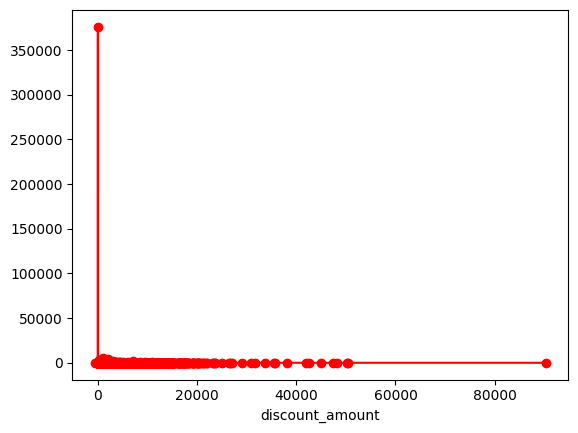

In [ ]:
#Credibitlty

# check for anomalies in discount
coun = df['discount_amount'].value_counts().sort_index()
coun.plot(kind='line', color='red', marker='o')

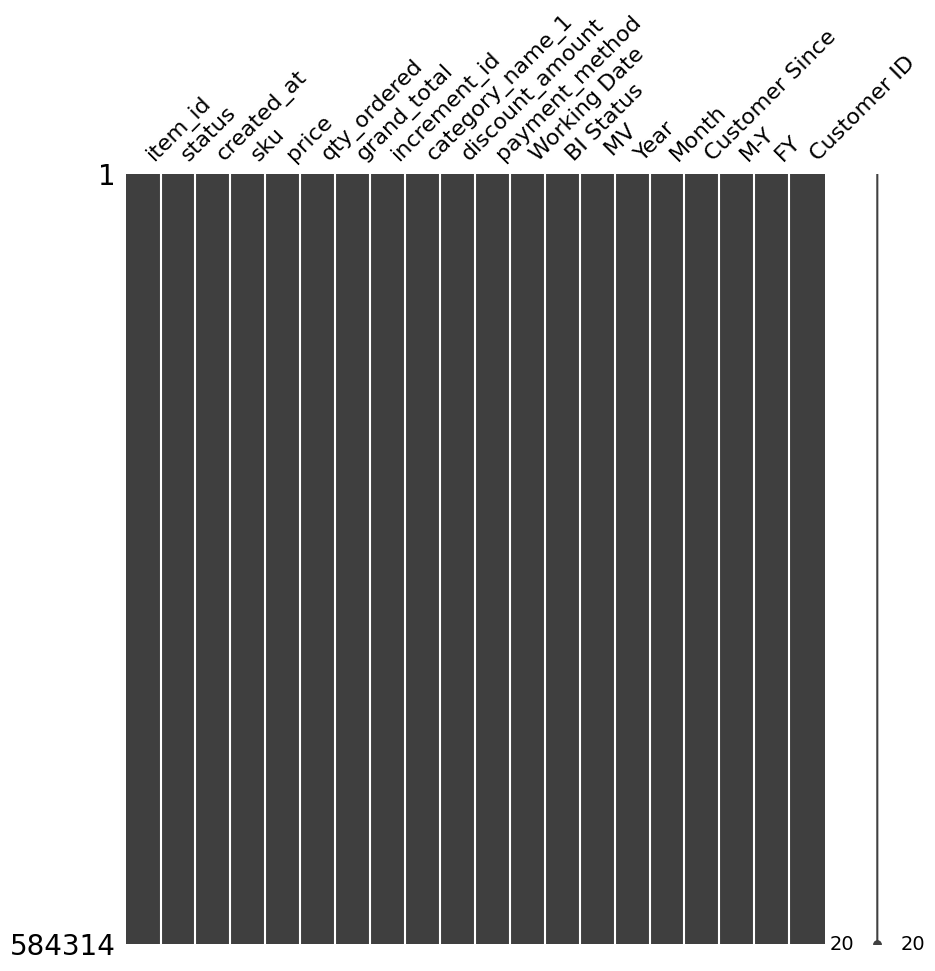

In [ ]:
# check appropriatness

# use missingno to see null values
import missingno as msno
msno.matrix(df, figsize=(10, 10))
plt.show()

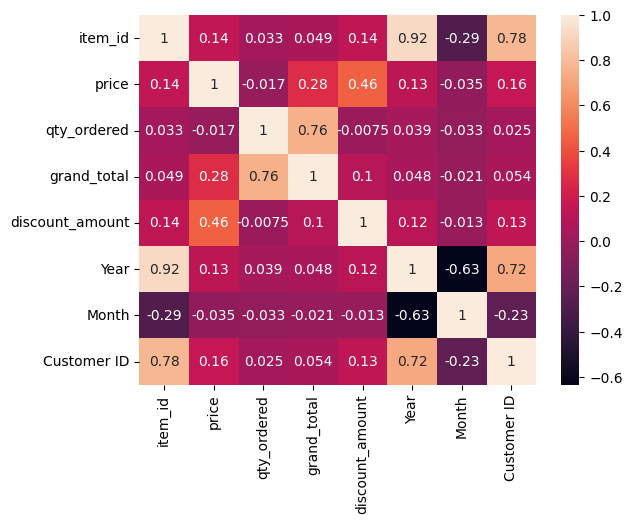

In [ ]:
# check appropriatness
# use correaltion matrix to find relation between numerical columns
corrmatrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

# 1) Quantity ordered per date

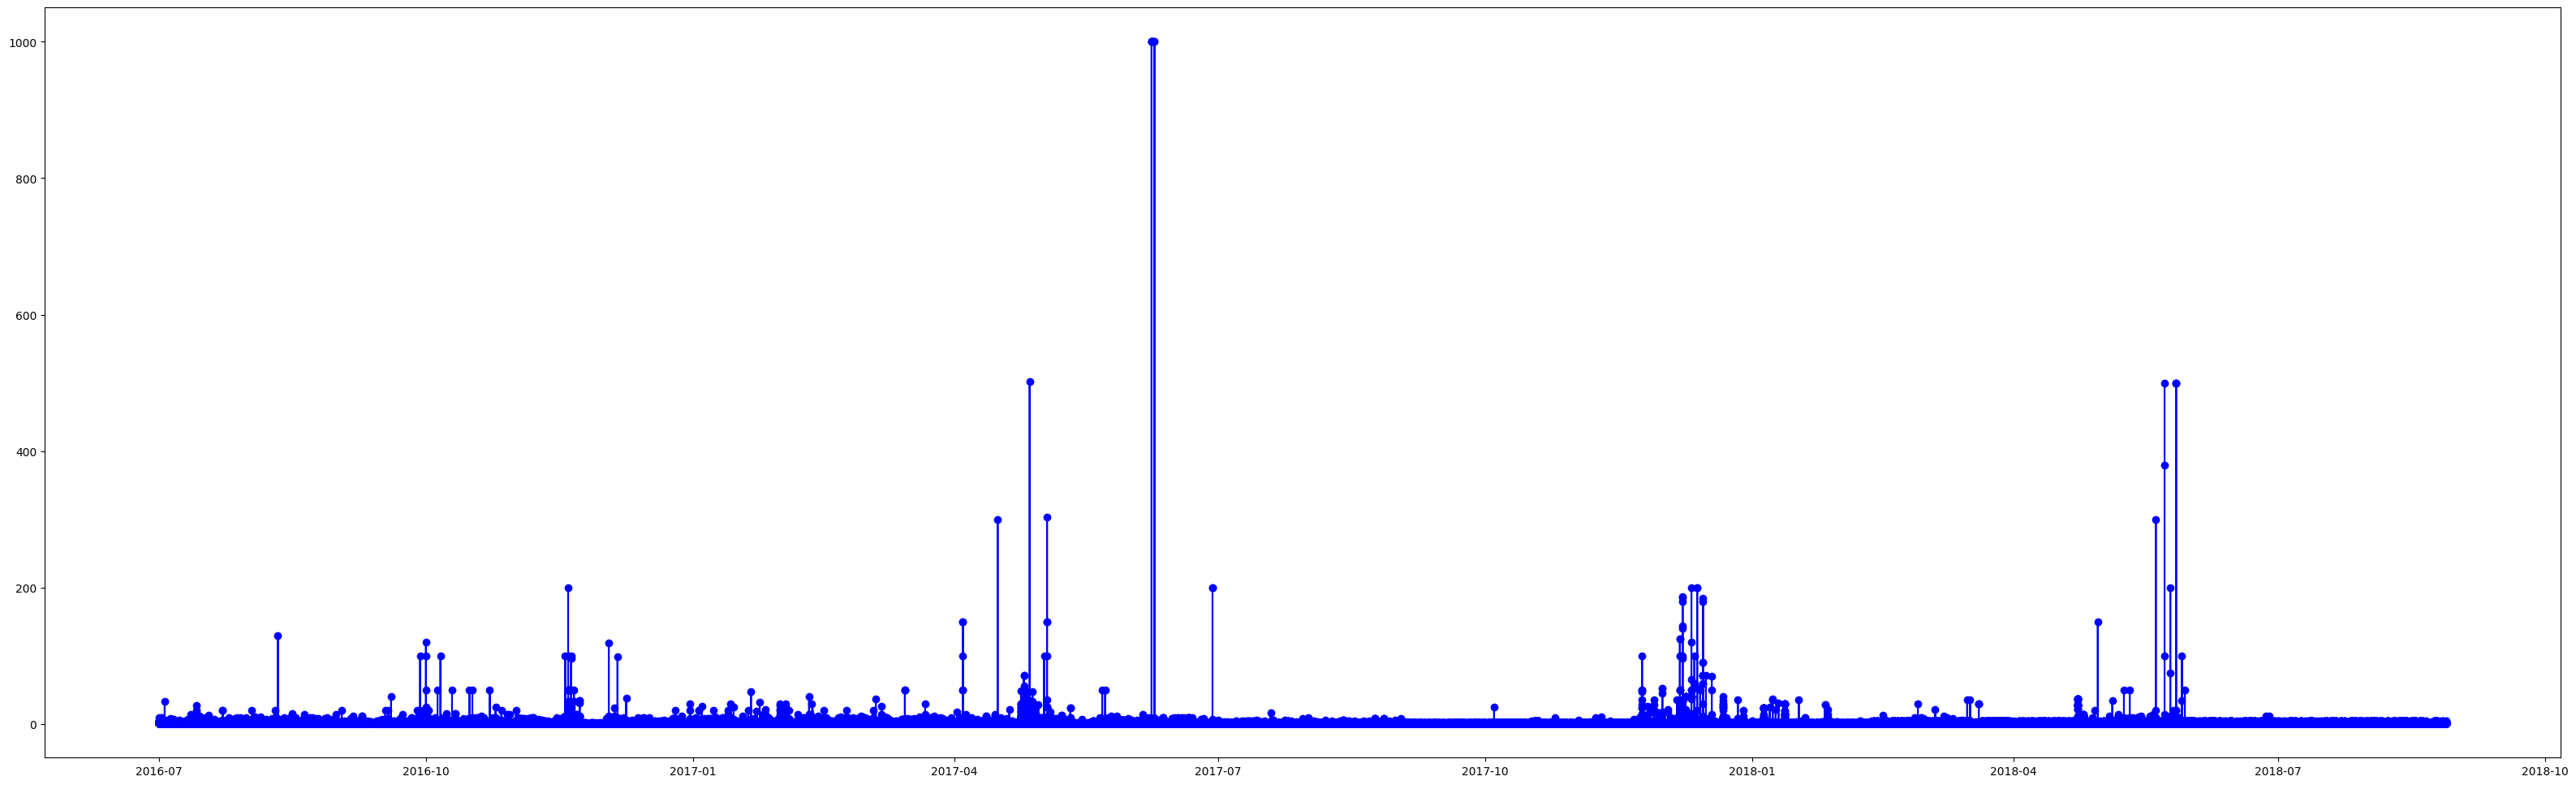

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.sort_values(by='created_at')
plt.figure(figsize=(40, 12))
plt.plot(df['created_at'], df['qty_ordered'], marker='o', linestyle='-', color='blue')
plt.show()

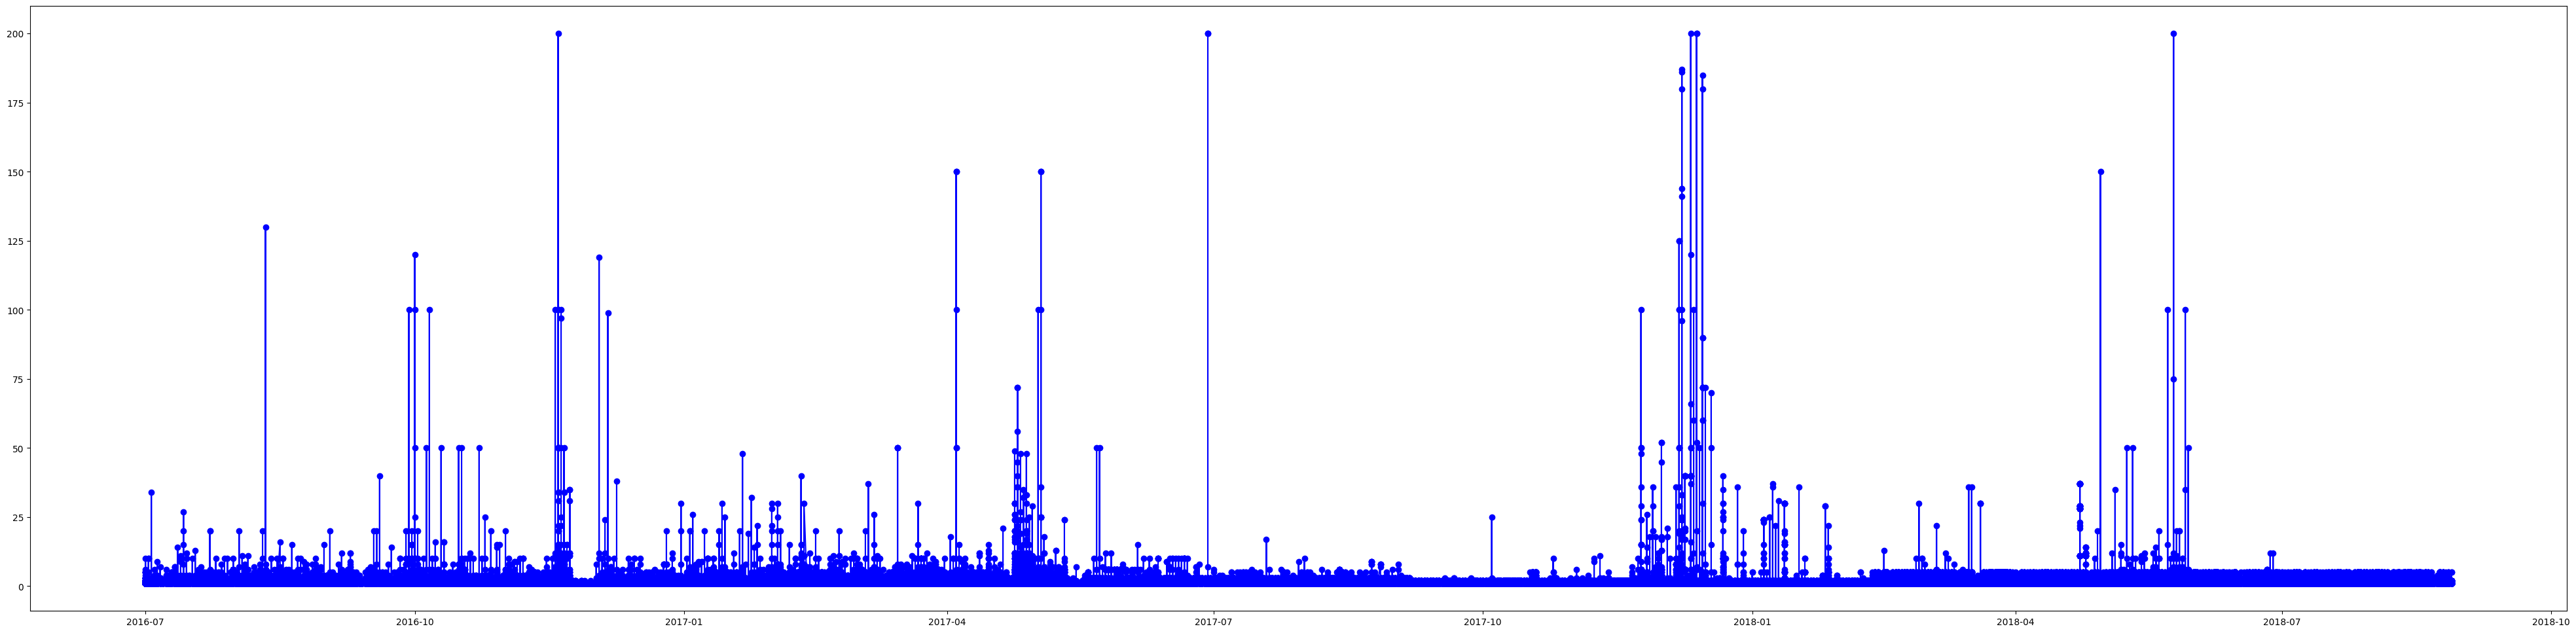

In [ ]:
# remove some outliers to get a better view
df_qty = df[df['qty_ordered'] < 300]
plt.figure(figsize=(50, 12))
plt.plot(df_qty['created_at'], df_qty['qty_ordered'], marker='o', linestyle='-', color='blue')
plt.show()

# 2) Range of discount per year

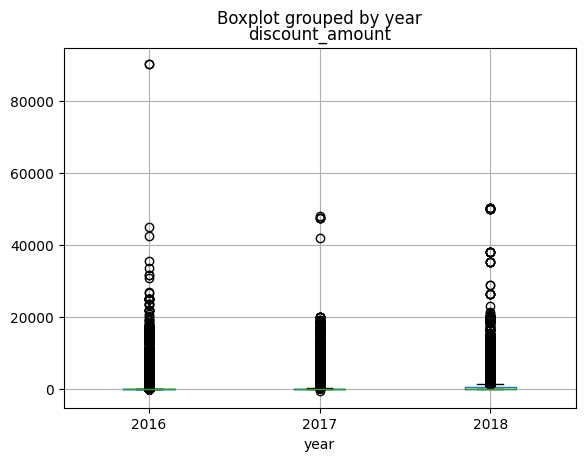

In [ ]:
df['Working Date'] = pd.to_datetime(df['Working Date'])
df['year'] = df['Working Date'].dt.year
df.boxplot(column=['discount_amount'], by='year')
plt.show()

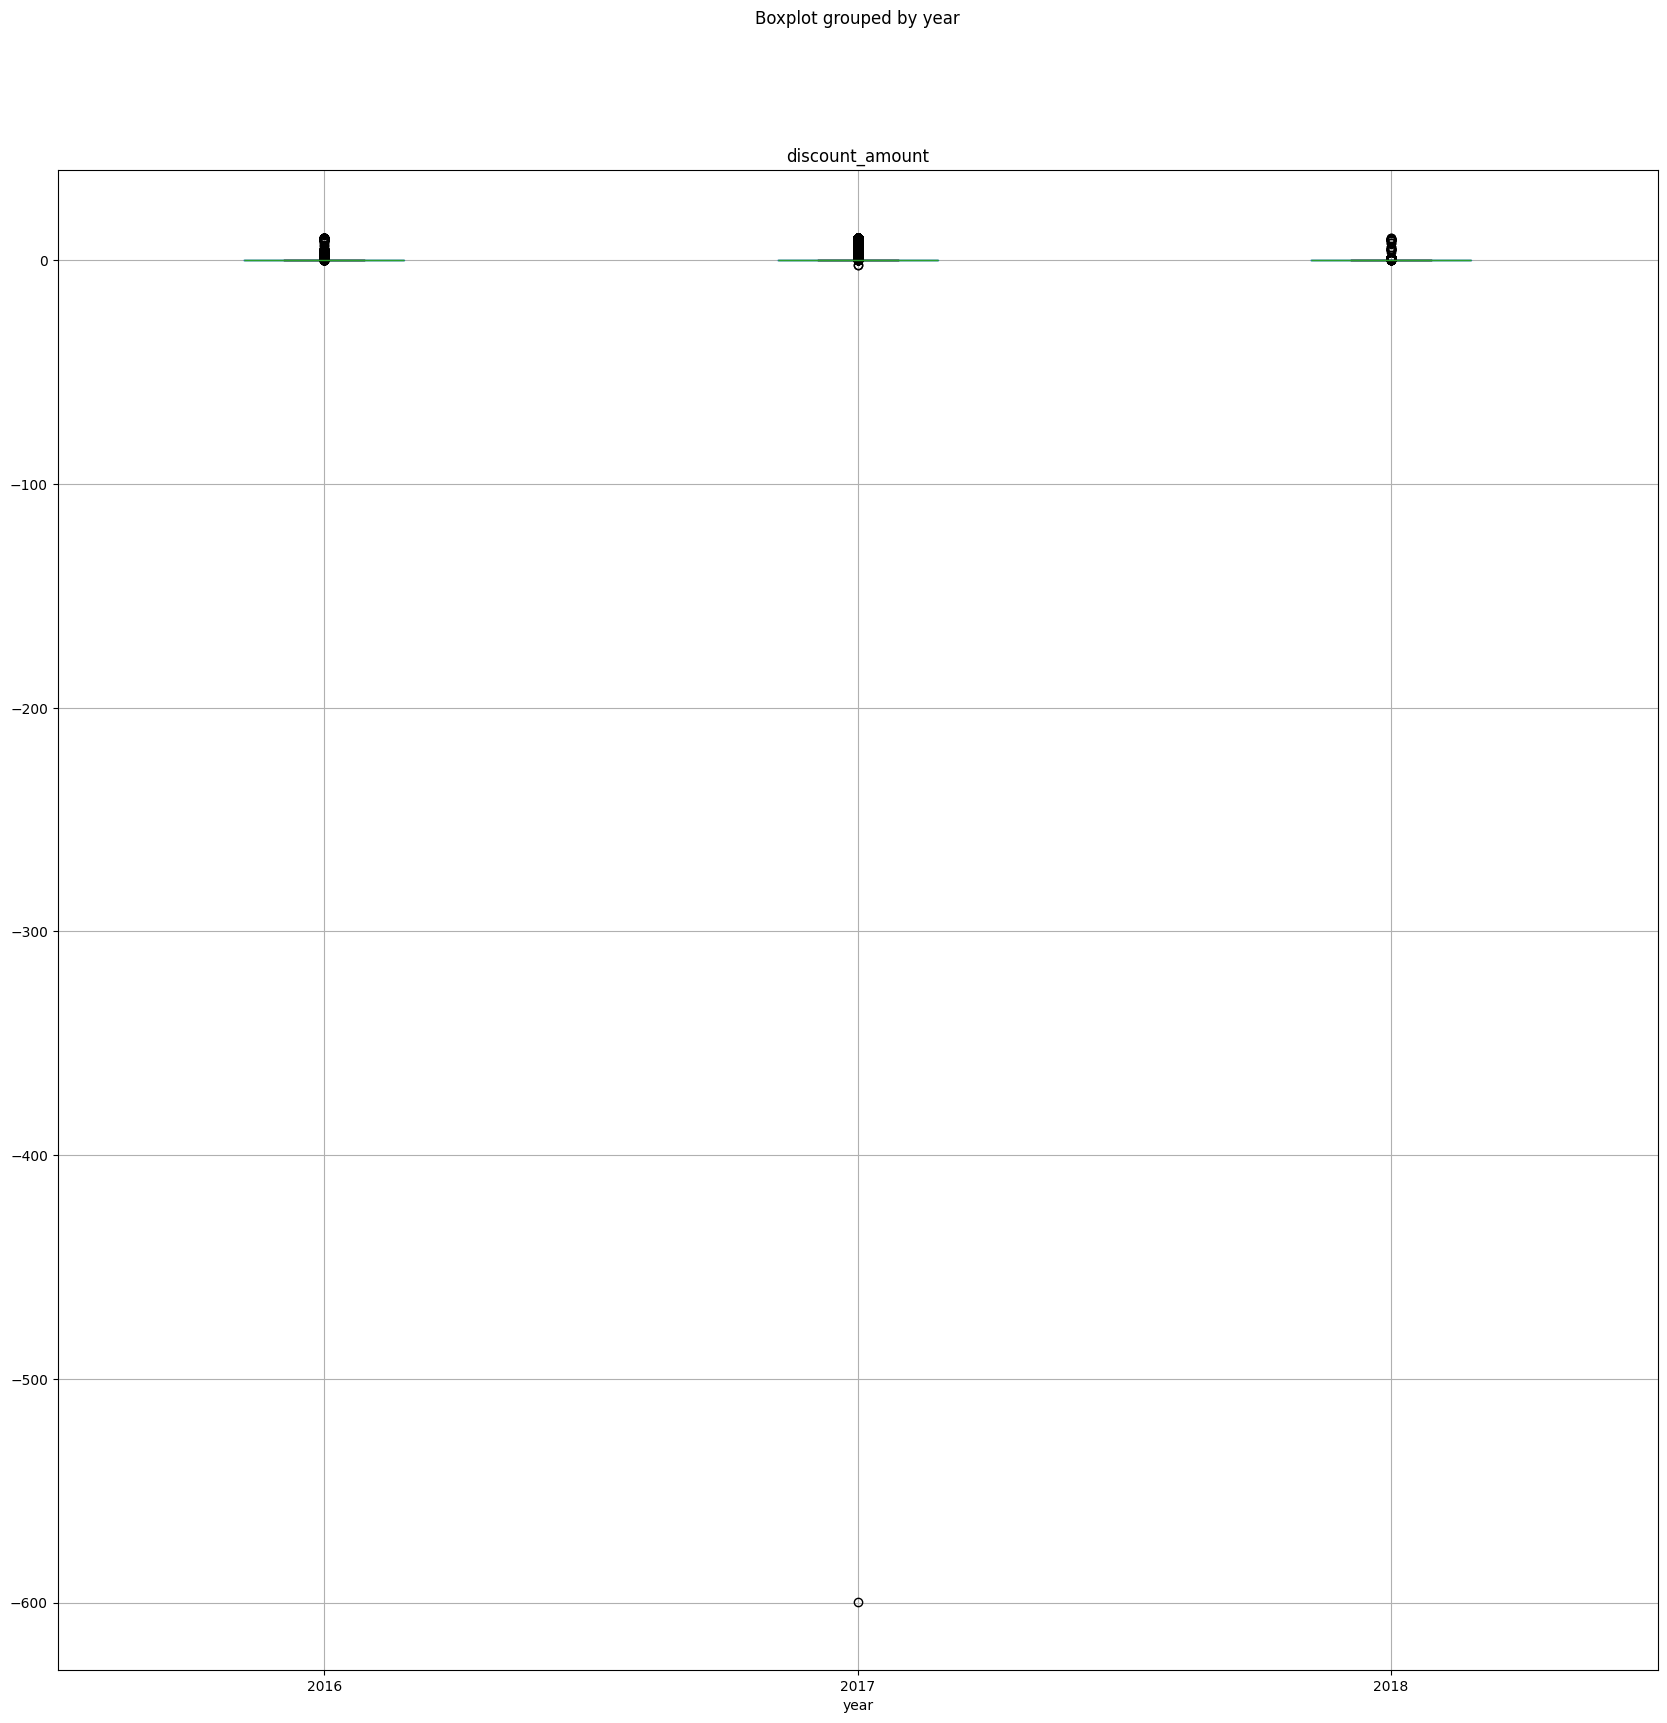

In [ ]:
# remove outliers to get a better chart

df_discount = df[df['discount_amount'] < 10]
df_discount.boxplot(column=['discount_amount'], by='year', figsize=(20, 20))
plt.show()

# 3) Average of Discount by month

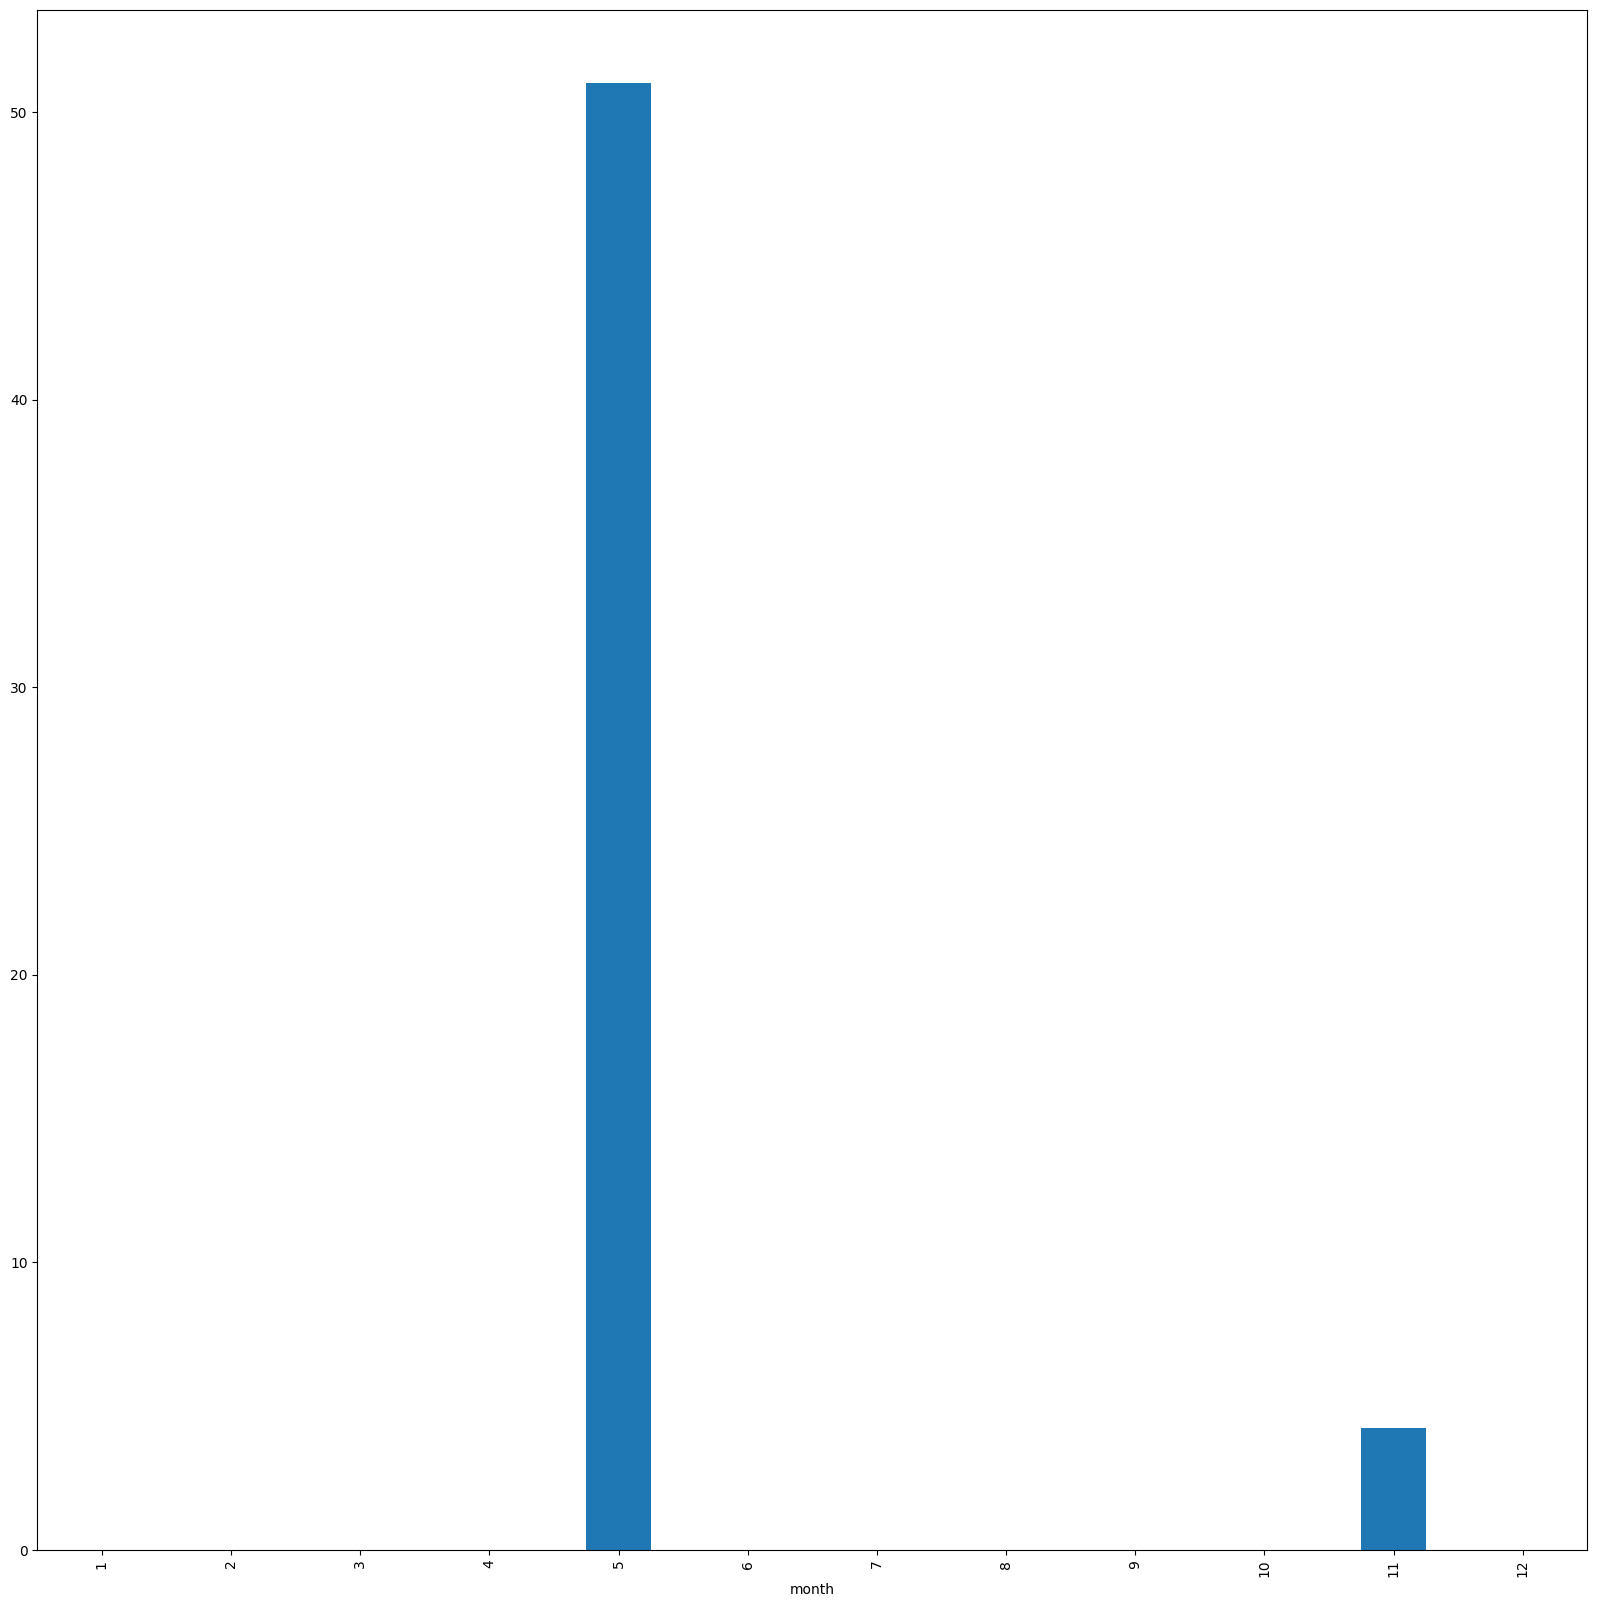

In [ ]:
df['month'] = df['Working Date'].dt.month

x = df.groupby('month')['discount_amount'].median()
x.plot(kind='bar', figsize=(20,20))
plt.show()

# 4) Total sales by month date

<ipython-input-25-201a13c6641c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['created_at'] = pd.to_datetime(df['M-Y'])


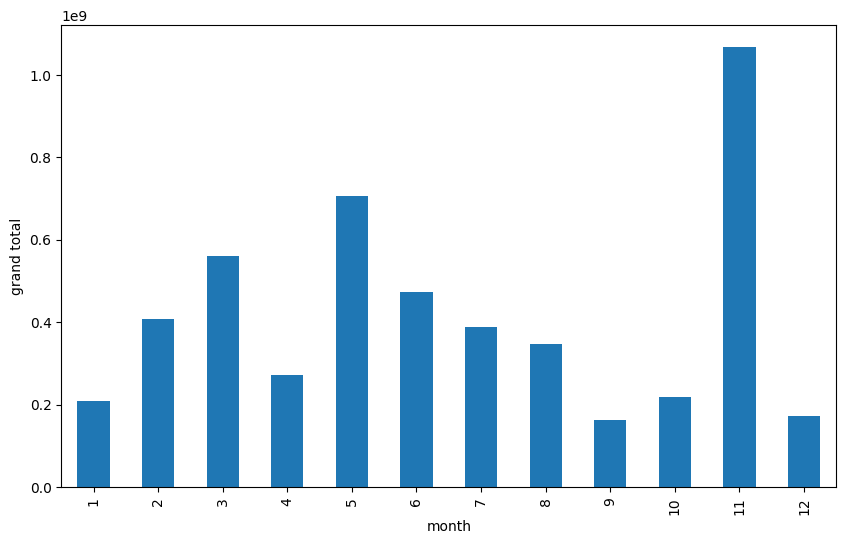

In [ ]:
# bar
df['created_at'] = pd.to_datetime(df['M-Y'])
result = df.groupby('month')['grand_total'].sum()
result.plot(kind='bar', figsize=(10,6))
plt.xlabel('month')
plt.ylabel('grand total')
plt.show()

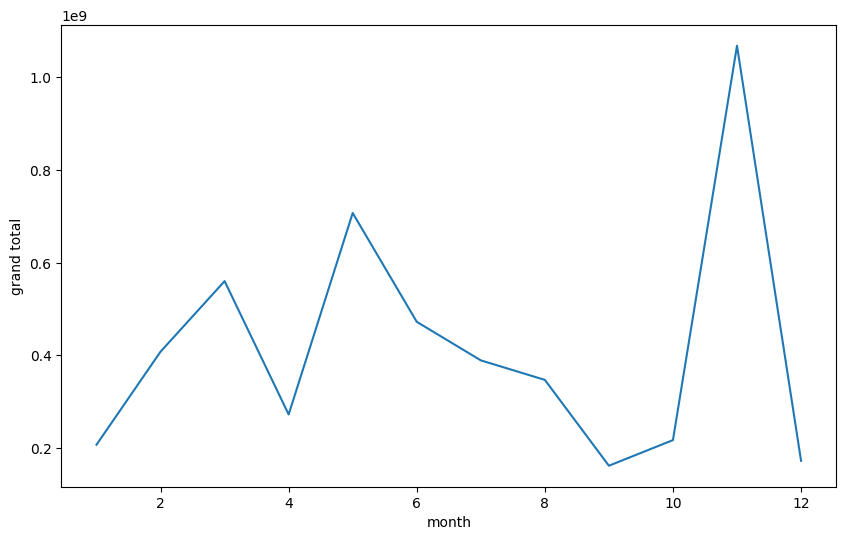

In [ ]:
# line
result.plot(kind='line', figsize=(10,6))
plt.xlabel('month')
plt.ylabel('grand total')
plt.show()

# 5) sales per category

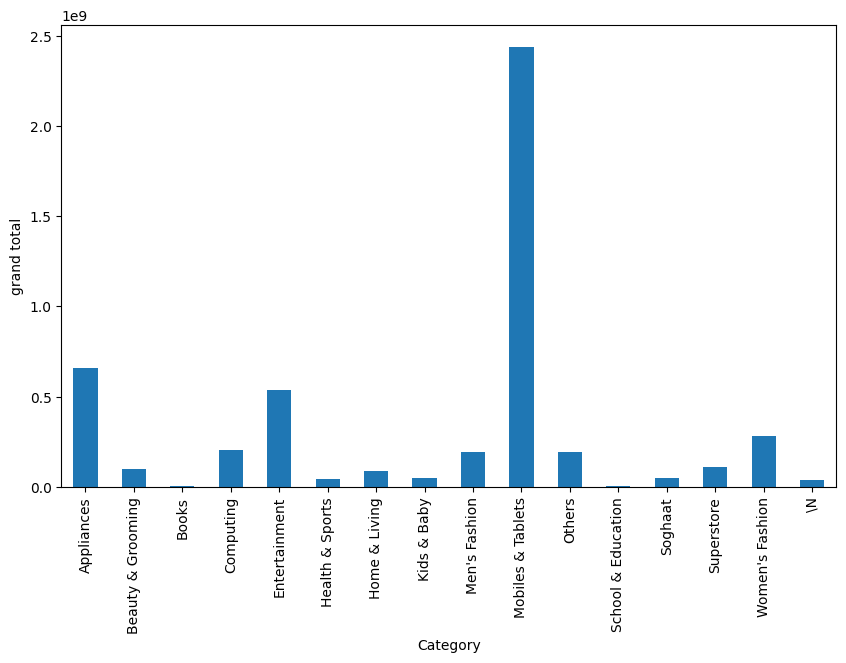

In [ ]:
result = df.groupby('category_name_1')['grand_total'].sum()
result.plot(kind='bar', figsize=(10,6))
plt.xlabel('Category')
plt.ylabel('grand total')
plt.show()

Usmani, Z and Rasheed. S, (2021), Pakistan's Largest E-Commerce Dataset, Kaggle, Available at: https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset, (Accessed: 04/04/2025 )